In [1]:
import os
print(os.listdir())

['.ipynb_checkpoints', 'housingData-Real.csv', 'Untitled.ipynb']


In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
%matplotlib inline

In [5]:
#import dataset
data = pd.read_csv('./housingData-Real.csv')
    

In [7]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [9]:
#select yours colunms

livingspace = data['sqft_living']
price = data['price']

In [10]:
price

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [15]:
#X is usally in caps and y in lower case
#convert living space into 2-d matrix
X = np.array(livingspace).reshape(-1,1)

In [16]:
X

array([[1180],
       [2570],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]], dtype=int64)

In [13]:
#convert price into 2-D matrix
y = np.array(price)

In [14]:
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [18]:
# convert the data into test and training
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3)


In [19]:
x_test

array([[2040],
       [1720],
       [2910],
       ...,
       [1380],
       [2940],
       [2790]], dtype=int64)

In [21]:
#pass your data into linear Regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [23]:
#create a predictor
predictor = regressor.predict(x_test)

In [24]:
predictor

array([529574.76417841, 440770.35545911, 771011.75038398, ...,
       346415.67119486, 779337.16370142, 737710.09711425])

In [25]:
#this prediction is more helpful with graphs and plots


Text(0, 0.5, 'Price')

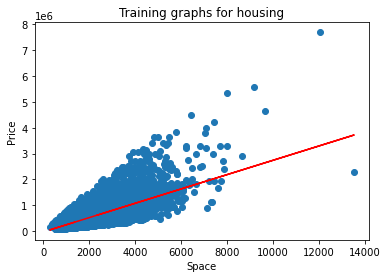

In [31]:
#plot for training dataset
plt.scatter(x_train, y_train)
plt.plot(x_train, regressor.predict(x_train), color='red')
plt.title('Training graphs for housing')
plt.xlabel('Space')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

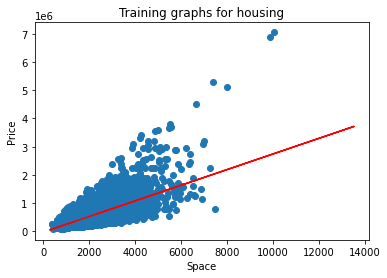

In [32]:
#plot for test dataset
plt.scatter(x_test, y_test)
plt.plot(x_train, regressor.predict(x_train), color='red')
plt.title('Training graphs for housing')
plt.xlabel('Space')
plt.ylabel('Price')